<a href="https://colab.research.google.com/github/Felipe-DelosSantos09/Diplomado-IA/blob/master/Experimento_Taller_v_alumnos_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa para clasificación en agricultura, CEC-UACh, DIPLOMADO CDeIAA

# Instructor del módulo del Diplomado:
Dr. Juan Carlos Olguín Rojas

Experimento para clasificar Manzanas_Taller 09/06/2024

INICIO:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras

# imprimir la versión de tensorflow
print(tf.__version__)

2.15.0


In [ ]:
import cv2
# imprimir la versión de tensorflow de OpenCv
print(cv2.__version__)

4.8.0


In [ ]:
!cp /content/drive/MyDrive/MANZANAS_COLAB_ZIP_2.zip ../

In [ ]:
import zipfile
import io

# se crea una carpeta en drive con el nombre: EXPERIMENTO_TALLER

Copiamos el contenido de (MANZANAS_COLAB_ZIP_2.zip) a la carpeta EXPERIMENTO_TALLER:

In [ ]:
!unzip /content/drive/MyDrive/MANZANAS_COLAB_ZIP_2.zip -d /content/drive/MyDrive/EXPERIMENTO_TALLER

Archive:  /content/drive/MyDrive/MANZANAS_COLAB_ZIP_2.zip
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2/validation/Gala_s/ManzanaV_1112.jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2/validation/Gala_s/ManzanaV_1195.jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2/validation/Gala_s/ManzanaV_1201.jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2/validation/Gala_s/ManzanaV_1066.jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2/validation/Gala_s/ManzanaV_1130.jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2/validation/Gala_s/ManzanaV_1160.jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2/validation/Gala_s/ManzanaV_1159.jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2/validation/Gala_s/ManzanaV_1108.jpg  
  inflating: /content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANA

Importamos los datos, poniendo la dirección donde se encuentran, que en el caso de Colab es la dirección base_dir:

In [ ]:
import os

base_dir = '/content/drive/MyDrive/EXPERIMENTO_TALLER/MANZANAS_COLAB_2'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training
train_Gala_s_dir = os.path.join(train_dir, 'Gala_s')
train_Golden_s_dir = os.path.join(train_dir, 'Golden_s')
train_Granny_s_dir = os.path.join(train_dir, 'Granny_s')
train_Red_s_dir = os.path.join(train_dir, 'Red_s')


# Directorio con las imagenes de validation
validation_Gala_s_dir = os.path.join(validation_dir, 'Gala_s')
validation_Golden_s_dir =os.path.join(validation_dir, 'Golden_s')
validation_Granny_s_dir = os.path.join(validation_dir, 'Granny_s')
validation_Red_s_dir = os.path.join(validation_dir, 'Red_s')

# Directorio con las imagenes de test
test_Gala_s_dir = os.path.join(test_dir, 'Gala_s')
test_Golden_s_dir = os.path.join (test_dir, 'Golden_s')
test_Granny_s_dir = os.path.join (test_dir, 'Granny_s')
test_Red_s_dir = os.path.join(test_dir, 'Red_s')


Imprimo la cantidad de imágenes a utilizar:

In [ ]:
print('total imagenes entrenamiento Gala_s :', len(os.listdir(train_Gala_s_dir) ))
print('total imagenes entrenamiento Golden_s :', len(os.listdir(train_Golden_s_dir) ))
print('total imagenes entrenamiento Granny_s :', len(os.listdir(train_Granny_s_dir) ))
print('total imagenes entrenamiento Red_s :', len(os.listdir(train_Red_s_dir) ))


print('total imagenes validacion Gala_s :', len(os.listdir(validation_Gala_s_dir) ))
print('total imagenes validacion Golden_s :',len(os.listdir(validation_Golden_s_dir) ) )
print('total imagenes validacion Granny_s :',len(os.listdir(validation_Granny_s_dir) ) )
print('total imagenes validacion Red_s :', len(os.listdir(validation_Red_s_dir) ))


print('total imagenes prueba Gala_s :',len(os.listdir(test_Gala_s_dir) ) )
print('total imagenes prueba Golden_s :',len(os.listdir(test_Golden_s_dir) ))
print('total imagenes prueba Granny_s :',len(os.listdir(test_Granny_s_dir) ) )
print('total imagenes prueba Red_s :', len(os.listdir(test_Red_s_dir) ))


total imagenes entrenamiento Gala_s : 420
total imagenes entrenamiento Golden_s : 420
total imagenes entrenamiento Granny_s : 420
total imagenes entrenamiento Red_s : 420
total imagenes validacion Gala_s : 90
total imagenes validacion Golden_s : 90
total imagenes validacion Granny_s : 90
total imagenes validacion Red_s : 90
total imagenes prueba Gala_s : 90
total imagenes prueba Golden_s : 90
total imagenes prueba Granny_s : 90
total imagenes prueba Red_s : 90


Acondicionamiento y normalización de las imágenes:

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255. )
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=90,
                                                    class_mode='categorical',
                                                    target_size=(256, 256))

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=90,
                                                         class_mode  = 'categorical',
                                                         target_size = (256, 256))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=90,
                                                         class_mode  = 'categorical',
                                                         target_size = (256, 256),
                                                         shuffle = False)


Found 1680 images belonging to 4 classes.
Found 360 images belonging to 4 classes.
Found 360 images belonging to 4 classes.


#Experimento
# Arquitectura VGG16 con Fine Tuning

In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape = (256, 256, 3),
                                include_top = False,
                                weights = 'imagenet')

pre_trained_model.trainable = True

set_trainable = False


for layer in pre_trained_model.layers:
  #if layer.name == 'block5_conv1':
   # set_trainable = True
  #if layer.name == 'block5_conv2':
   # set_trainable = True
  if layer.name == 'block5_conv3':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

pre_trained_model.summary()

58889256/58889256 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                              

In [ ]:
from tensorflow.keras import Model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

modelFT = Sequential()
modelFT.add(pre_trained_model)
modelFT.add(Flatten())
modelFT.add(Dense(4096, activation='relu'))
modelFT.add(Dense(512, activation='relu'))
modelFT.add(Dense(4, activation='sigmoid'))


modelFT.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 4096)              134221824 
                                                                 
 dense_1 (Dense)             (None, 512)               2097664   
                                                                 
 dense_2 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 151036228 (576.16 MB)
Trainable params: 138681348 (529.03 MB)
Non-trainable params: 12354880 (47.13 MB)
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import RMSprop

modelFT.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics = ['acc'])

In [ ]:
batch_size = 90
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

18
4


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint_VGG16_FT = ModelCheckpoint(filepath="pesos_VGG16_FT.weights.best.hdf5",save_best_only=True,verbose=1)

In [ ]:
early_stop= EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True,mode="min")

In [ ]:
historyFT = modelFT.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = steps_per_epoch,
            epochs = 50,
            validation_steps = validation_steps,
            verbose = 2,callbacks=[checkpoint_VGG16_FT,early_stop])

Epoch 1/50

Epoch 1: val_loss improved from inf to 0.89150, saving model to pesos_VGG16_FT.weights.best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 - 70s - loss: 2.3530 - acc: 0.4937 - val_loss: 0.8915 - val_acc: 0.6028 - 70s/epoch - 4s/step
Epoch 2/50

Epoch 2: val_loss improved from 0.89150 to 0.29670, saving model to pesos_VGG16_FT.weights.best.hdf5
18/18 - 38s - loss: 0.5736 - acc: 0.7459 - val_loss: 0.2967 - val_acc: 0.9361 - 38s/epoch - 2s/step
Epoch 3/50

Epoch 3: val_loss improved from 0.29670 to 0.20048, saving model to pesos_VGG16_FT.weights.best.hdf5
18/18 - 38s - loss: 0.3180 - acc: 0.8723 - val_loss: 0.2005 - val_acc: 0.9389 - 38s/epoch - 2s/step
Epoch 4/50

Epoch 4: val_loss improved from 0.20048 to 0.19524, saving model to pesos_VGG16_FT.weights.best.hdf5
18/18 - 33s - loss: 0.1554 - acc: 0.9525 - val_loss: 0.1952 - val_acc: 0.9111 - 33s/epoch - 2s/step
Epoch 5/50

Epoch 5: val_loss did not improve from 0.19524
18/18 - 27s - loss: 0.1546 - acc: 0.9415 - val_loss: 0.7434 - val_acc: 0.7917 - 27s/epoch - 2s/step
Epoch 6/50

Epoch 6: val_loss improved from 0.19524 to 0.09348, saving model to pesos_VGG16_FT.weights

Cargamos los mejores pesos del entrenamiento:

In [ ]:
modelFT.load_weights("/content/pesos_VGG16_FT.weights.best.hdf5")

In [ ]:
import numpy as np

Realizamos la evaluación del Accuracy

In [ ]:
test_lost, test_acc= modelFT.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

4/4 [==============================] - 4s 721ms/step - loss: 0.0275 - acc: 0.9889
Test Accuracy: 0.9888888597488403


Comparamos el entrenamiento y la validación del Accuracy(exactitud) y el loss (perdida)

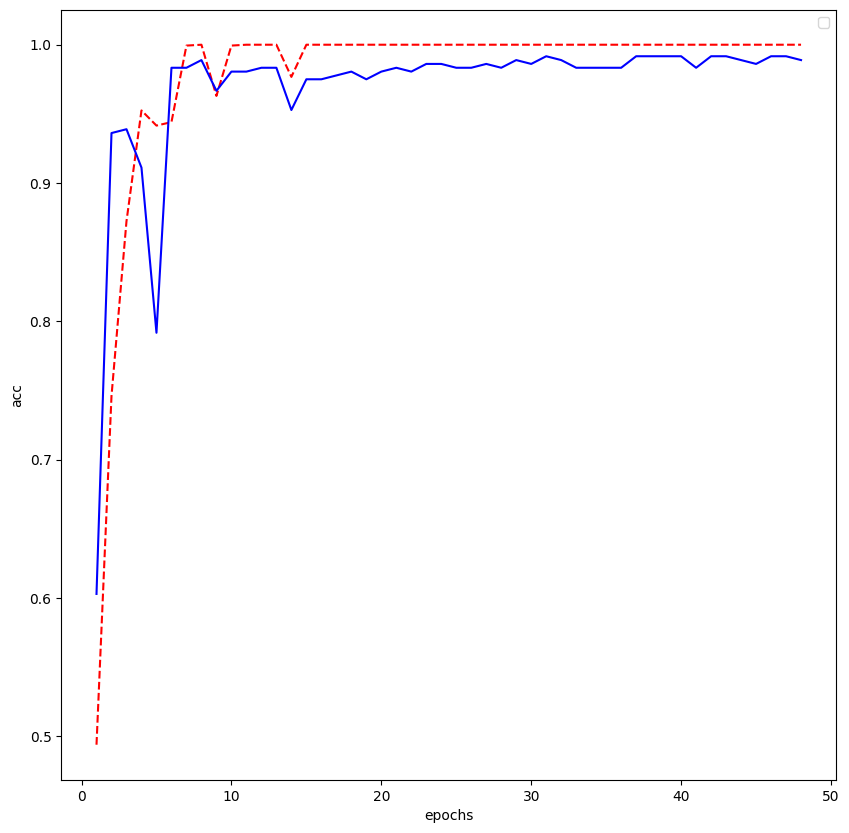

In [ ]:
import matplotlib.pyplot as plt

acc      = historyFT.history[     'acc' ]
val_acc  = historyFT.history[ 'val_acc' ]
loss     = historyFT.history[    'loss' ]
val_loss = historyFT.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs

f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     acc, 'r--', label=''  )
ax.plot  ( epochs, val_acc,  'b', label='')
ax.set_title ("")
ax.set_ylabel('acc')
ax.set_xlabel('epochs')
ax.legend()
f.savefig("Training and Validation Accuracy VGG16_FT.png")
f.savefig("Training and Validation Accuracy VGG16_FT.eps")

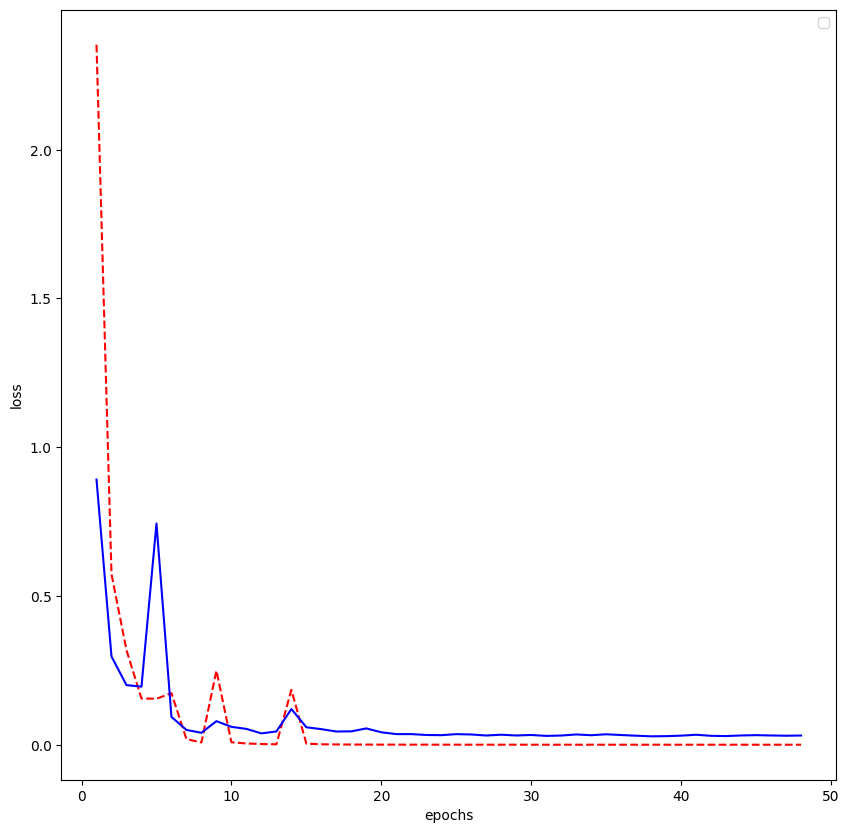

In [ ]:
f, ax = plt.subplots(figsize=(10,10))
ax.plot  ( epochs,     loss, 'r--', label=''  )
ax.plot  ( epochs, val_loss ,  'b', label='' )
ax.set_title ("")
ax.set_ylabel('loss')
ax.set_xlabel('epochs')
ax.legend()
f.savefig("Training and Validation Loss VGG16_FT.png")
f.savefig("Training and Validation Loss VGG16_FT.eps")

# Matriz de Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
# Funcion que permite graficar las matrices de confusion
def plot_heatmap(y_true, y_pred, class_names, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(
        cm,
        annot=True,
        square=True,
        xticklabels=class_names,
        yticklabels=class_names,
        fmt='d',
        cmap=plt.cm.Blues,
        cbar=False,
        ax=ax
    )
    ax.set_title(title, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xlabel('Predicted Label', fontsize=12)

4/4 [==============================] - 3s 540ms/step


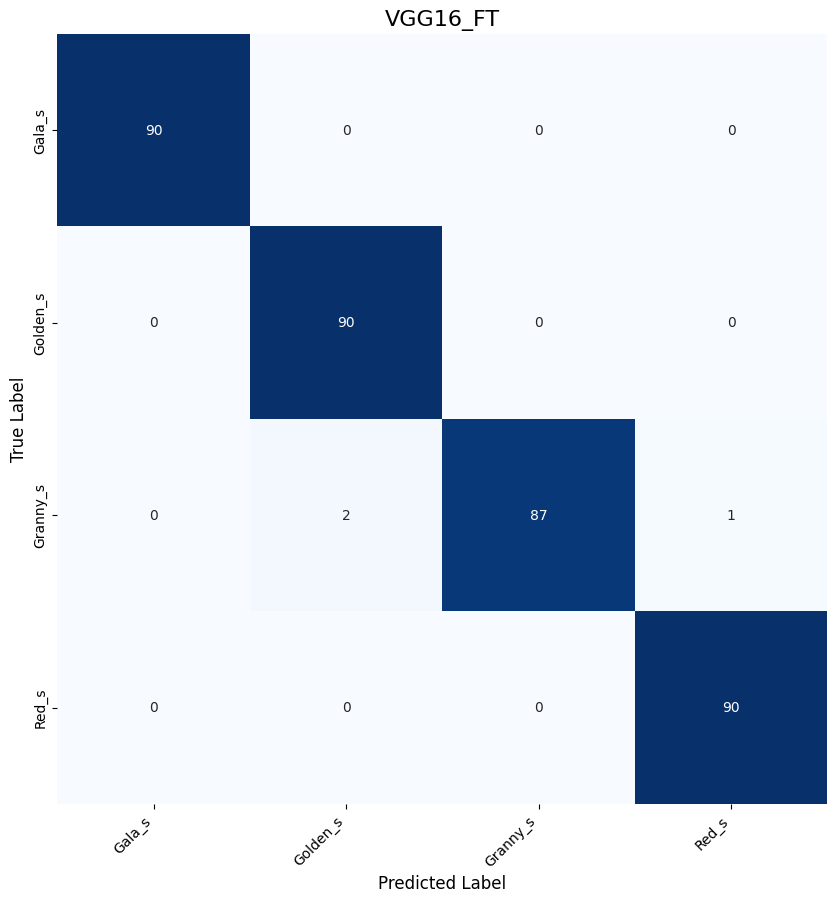

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
plot_heatmap(test_generator.classes, np.argmax(modelFT.predict(test_generator),axis=1), test_generator.class_indices.keys() , ax, title="VGG16_FT")
fig.savefig("VGG16_FT matrix_confusion.png")
fig.savefig("VGG16_FT matrix_confusion.eps")

# Métricas de desempeño del clasificador

In [ ]:
print(classification_report(test_generator.classes, np.argmax(modelFT.predict(test_generator),axis=1), target_names=test_generator.class_indices ))

4/4 [==============================] - 3s 516ms/step
              precision    recall  f1-score   support

      Gala_s       0.99      1.00      0.99        90
    Golden_s       0.98      1.00      0.99        90
    Granny_s       1.00      0.97      0.98        90
       Red_s       0.99      0.99      0.99        90

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



Guardamos el History

In [ ]:
import pandas as pd

# assuming you stored your model.fit results in a 'history' variable:
#history = model.fit(x_train, y_train, epochs=10)

# convert the history.history dict to a pandas DataFrame:
hist_df = pd.DataFrame(historyFT.history)

# save to json:
hist_json_file = 'history.json'
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv:
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)